In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dpath = os.path.join('../data', 'EXIST 2024 Lab', 'EXIST 2024 Tweets Dataset', 'training', 'EXIST2024_training.json')
# dpath = os.path.join('../data', 'EXIST 2024 Lab', 'EXIST 2024 Memes Dataset', 'training', 'EXIST2024_training.json')
# data/EXIST 2024 Lab/EXIST 2024 Memes Dataset/training/EXIST2024_training.json

with open(dpath, 'r') as file:
    data = json.load(file)

In [3]:
record_paths = list(data.keys())

In [4]:
flattened_data = []
for key, value in data.items():
    row = {'id_EXIST': key}
    for k, v in value.items():
        row[k] = v
    flattened_data.append(row)

df = pd.DataFrame(flattened_data)


In [5]:
df.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task1,labels_task2,labels_task3,split
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[White or Caucasian, Hispano or Latino, White ...","[Bachelor’s degree, Bachelor’s degree, High sc...","[Italy, Mexico, United States, Spain, Spain, C...","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Black or African American, Hispano or Latino,...","[High school degree or equivalent, Bachelor’s ...","[United Kingdom, Mexico, United States, Portug...","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Black or African American, Hispano or Latino,...","[High school degree or equivalent, Bachelor’s ...","[United Kingdom, Mexico, United States, Portug...","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, Hispano or Latino, White o...","[High school degree or equivalent, Bachelor’s ...","[Mexico, Chile, Spain, Spain, Portugal, Spain]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, Hispano or Latino, White o...","[Bachelor’s degree, Bachelor’s degree, Master’...","[Mexico, Afghanistan, United States, Italy, Po...","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES


In [6]:
column_name = 'ethnicities_annotators'

In [7]:
clm = df.explode(column_name)
len(clm)

41520

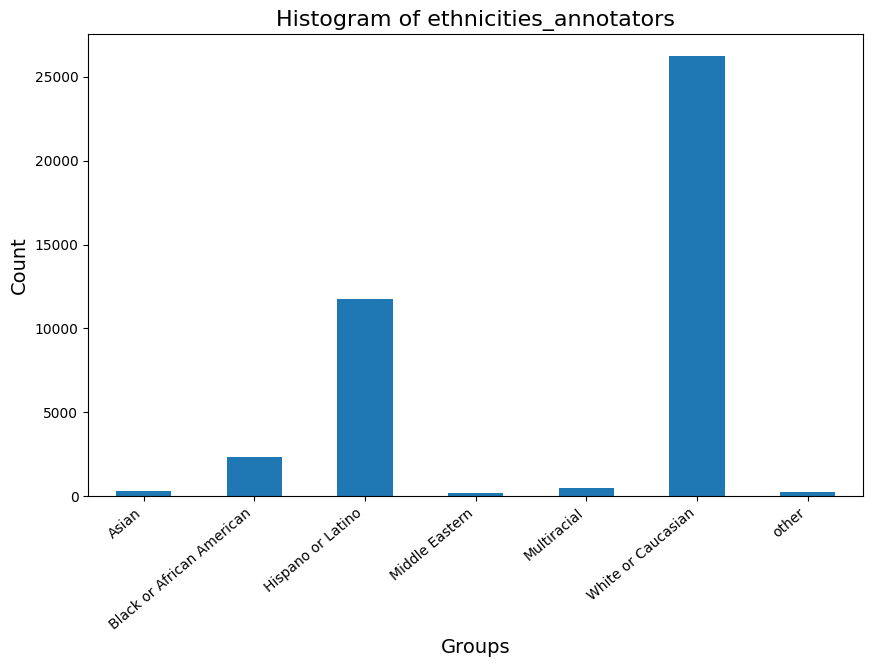

In [8]:
# Plot the histogram
plt.figure(figsize=(10, 6))
clm[column_name].value_counts().sort_index().plot(kind='bar')
plt.title(f'Histogram of {column_name}', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=40, ha='right')
# plt.tight_layout()
plt.show()